In [24]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
! pip install qutip # for Google Colab
from qutip import (
    Qobj,
    QobjEvo,
    Bloch,
    basis,
    sigmax,
    sigmay,
    sigmaz,
    qeye,
    mesolve,
    expect
)
import matplotlib.pyplot as plt

# Time-evolution of qubit state (in $\sigma_z$ field)
When the qubit $|\psi (t=0)\rangle=\cos\frac{\theta}{2} |0\rangle + e^{i \phi}\sin\frac{\theta}{2}|1\rangle$ is under the Hamiltonian,
$$\mathcal{H}/\hbar=-\frac{\omega}{2}\hat{\sigma}_z$$
the time evolution of the qubit state is represented by
$$|\psi (t)\rangle=\cos\frac{\theta}{2} |0\rangle + e^{-i \omega}e^{i \phi}\sin\frac{\theta}{2}|1\rangle.$$
This corresponds to the rotation in clock-wise with (angluar) frequency $\omega$ in XY plane on the bloch sphere.


In the first example below, we will prepare the qubit in the $∣+⟩$ at $𝑡=0$ and set up the Hamiltonian as described in the equation above.
Here, we will introduce the QuTiP function `mesolve`, which is used to solve the Schrödinger equation (and later, the Lindblad master equation).

Links: https://qutip.readthedocs.io/en/master/guide/dynamics/dynamics-master.html


In [25]:
# calculate the time trace of |+> state under the sigma z field

time_list = np.linspace(0, 1, 101) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q

# definition of the initial state (|+> state)
psi0 = (basis(2,0)+basis(2,1))/np.sqrt(2) # |+> state

# definition of the hamiltonian in laboratory frame
H = -omega_q/2 * sigmaz()

# solve the Schrodinger
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()])

`mesolve` function return the `Result` instance which contains the time trace of the expectation values of the observables given as `e_ops`. We can have access to the expectation values by `Result.expect`. In this case, `Result.expect` is an array of the time trace of each observables.

In [26]:
result.expect

[array([ 1.00000000e+00,  9.98026750e-01,  9.92114744e-01,  9.82287316e-01,
         9.68583249e-01,  9.51056626e-01,  9.29776610e-01,  9.04827189e-01,
         8.76306823e-01,  8.44328075e-01,  8.09017143e-01,  7.70513391e-01,
         7.28968768e-01,  6.84547242e-01,  6.37424113e-01,  5.87785368e-01,
         5.35826917e-01,  4.81753799e-01,  4.25779417e-01,  3.68124675e-01,
         3.09017109e-01,  2.48689986e-01,  1.87381391e-01,  1.25333285e-01,
         6.27905392e-02, -2.28508529e-08, -6.27905948e-02, -1.25333367e-01,
        -1.87381512e-01, -2.48690153e-01, -3.09017323e-01, -3.68124928e-01,
        -4.25779710e-01, -4.81754135e-01, -5.35827296e-01, -5.87785787e-01,
        -6.37424555e-01, -6.84547699e-01, -7.28969239e-01, -7.70513861e-01,
        -8.09017612e-01, -8.44328532e-01, -8.76307259e-01, -9.04827590e-01,
        -9.29776973e-01, -9.51056946e-01, -9.68583525e-01, -9.82287539e-01,
        -9.92114905e-01, -9.98026836e-01, -1.00000000e+00, -9.98026612e-01,
        -9.9

Let's plot the time trace of each observable.

Text(0, 0.5, 'Expectation value')

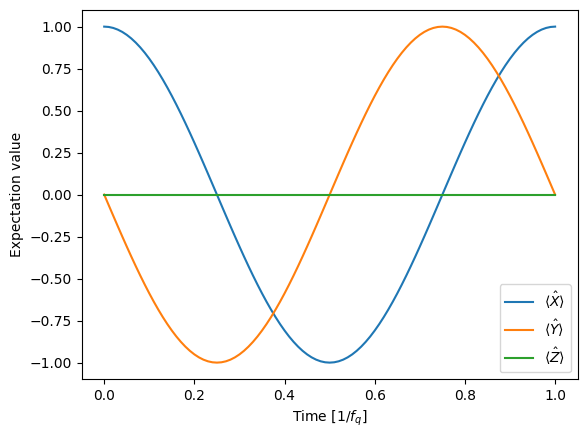

In [27]:
# plot the time evolution of bloch vector
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")
plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

We can also plot the time trace on Bloch sphere.

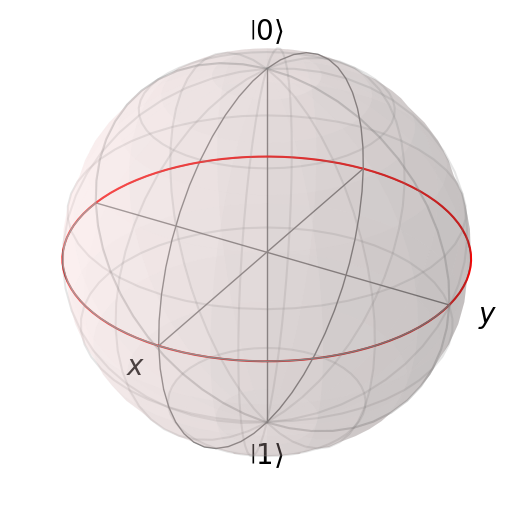

In [28]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")
b.render()
b.show()

# General Hamiltonian operator for qubits
From the Exercise 8,9,10 in Homework 1 part2, the general form of Hamiltonian of qubits (2 dimentional Hilbert space) is represented by
$$\mathcal{H}/\hbar=-\omega_I\hat{I}-\omega_x\hat{\sigma}_x/2-\omega_y\hat{\sigma}_y/2-\omega_z\hat{\sigma}_z/2.$$
After you find $\omega_x,\omega_y$ and $\omega_z$, you can set $\omega_I=0$ since it just shifts the eigenfreuencies and doesn't make any changes on the dynamics of the qubit states.

Now the two eigenstates in the bloch sphere correspond to the vector $|\phi_\pm\rangle=\pm\frac{1}{\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}}(\omega_x,\omega_y,\omega_z)^T$ and the eigenvalues are $\lambda_\pm=\mp\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}/2$.

 Using the same logic as "D. Rotating the qubit state on the Bloch sphere" in Homework 1 part 1, it is obvious that the Hamiltonian rotates the qubit on the Bloch sphere around the axis deined by $|\phi_\pm\rangle$ with angular frequency $\omega=\lambda_--\lambda_+=\sqrt{\omega_x^2+\omega_y^2+\omega_z^2}$.

In [29]:
# define a arbitrary Hamiltonian in 2-D Hilbert space
omega_x = 2*np.pi*0.6
omega_y = 2*np.pi*0.5
omega_z = 2*np.pi
H = -omega_x * sigmax()/2 - omega_y * sigmay()/2 - omega_z * sigmaz()/2

# diagonalization of Hamiltonian
eigvals, eigstates = H.eigenstates()
print("Eigenvalues:",eigvals)
freq_rotate = (eigvals[1]-eigvals[0])/2/np.pi # frequency of rotation scale from rad*Hz to Hz
print("Frequency:",freq_rotate)
period = 1/freq_rotate
print("Period:",period)

time_list = np.linspace(0, 2, 101) # [2\pi / omega_z] time points normalized by qubit freq

# definition of the initial state (|0> state)
psi0 = basis(2,0)

# solve the Schrodinger equation
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()])

Eigenvalues: [-3.9862342  3.9862342]
Frequency: 1.2688577540449522
Period: 0.7881104062391006


Text(0, 0.5, 'Expectation value')

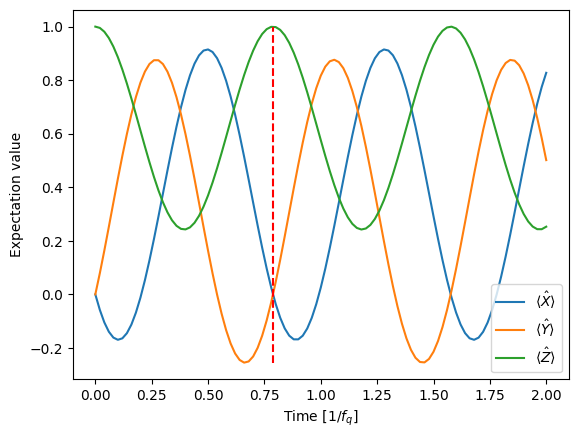

In [30]:
# plot the time evolution of bloch vector
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

# plot the vertical line at the period of the rotation
plt.vlines(period, np.min(result.expect), np.max(result.expect), linestyles="dashed", colors="red")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

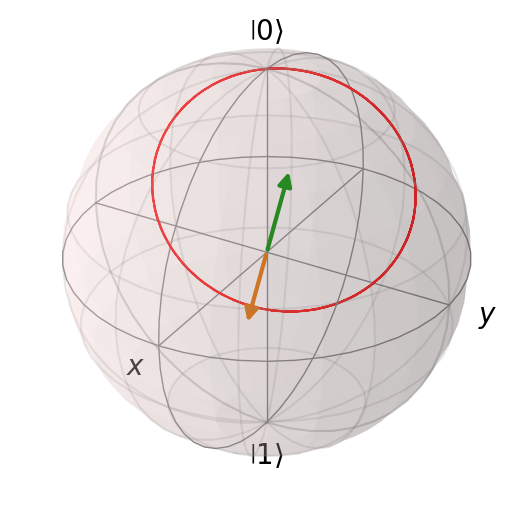

In [31]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")

# plot the rotation angle (eigenstates of the Hamiltonian)
b.add_states(eigstates)

b.render()
b.show()

# "rotating" frame vs. "lab" frame
A qubit is rotating on Bloch sphere along XY plane with frequency $\omega_q$ (Laboratory frame). But in most cases, we use rotating frame which rotates at some frequency.
Here we use units where $\hbar=1$.

1. Laboratory frame
$$\mathcal{H}_{\mathrm{lab}} = - \frac{\omega_q}{2} \,\sigma_z\\
|\psi\rangle_{\mathrm{lab}}=\cos\frac{\theta}{2} |0\rangle + e^{-i\omega_qt}e^{i \phi}\sin\frac{\theta}{2}|1\rangle$$
2. Rotating frame (rotating at $\omega_q$)
$$ U_{\mathrm{rf}} = \exp(-i\frac{\omega_q}{2}\sigma_z t)\\
|\psi\rangle_{\mathrm{rf}}=U_{\mathrm{rf}}\,|\psi\rangle_{\mathrm{lab}}\\
\mathcal{H}_{\mathrm{rot}} = i\,\dot{U_{\mathrm{rf}}}U_{\mathrm{rf}}^{\dagger}+U_{\mathrm{rf}}\mathcal{H}_{\mathrm{lab}}U_{\mathrm{rf}}^{\dagger}=0 $$

Thus, in this rotating frame, the qubit state will stay the same as its initial state.

In [32]:
# calculate the time trace of |+> state under the sigma z field
time_list = np.linspace(0, 1, 101) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q

# definition of the initial state (|+> state)
psi0 = (basis(2,0)+basis(2,1))/np.sqrt(2) # |+> state

# definition of the hamiltonian in laboratory frame
H_lab = -omega_q/2 * sigmaz()

# solve the Schrodinger equation# solve the Schrodinger equation
result_lab = mesolve(H=H_lab, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})

# acquire the eigenstates of the schrodinge eq (qubit state)
psi_lab = result_lab.states

For the rotating frame, it is very obvious that the qubit state just stays the same position. Here we will check if the simulation and the calculation above makes sense each other by recalculating the rotating-frame state vector by applying the rotating unitary operator on the lab-frame state vectors.

In [33]:
# calculate the rotating frame states by multiplying U_rf on psi_lab
psi_rf=[]
for time_idx, time in enumerate(time_list):
  oper=-1j*omega_q/2*time*sigmaz()
  U_rf=oper.expm()
  psi_rf.append(U_rf*psi_lab[time_idx])

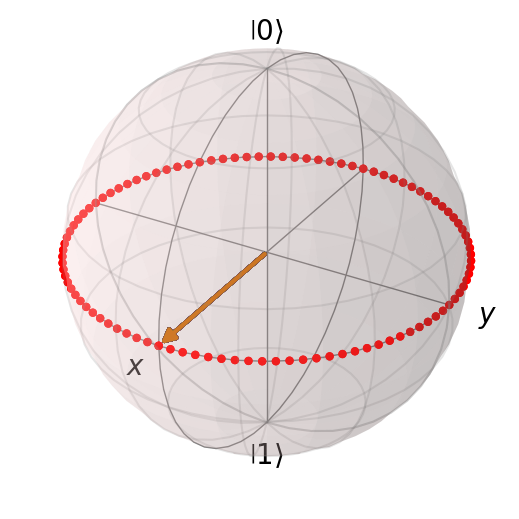

In [34]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# settings of Bloch class
b.point_marker=["o"]
b.point_size=[25]

# plot the laboratory frame states (plot points)
b.add_states(psi_lab,
             kind="point",
             colors=["red" for i in time_list])

# plot the rotating frame states (plot vectors)
b.add_states(psi_rf,
              kind="vector",)
b.render()
b.show()

Thus, in the laboratory frame the qubit is rotating at $\omega_q$, but it doesn't move in the rotating frame.

Text(0.5, 0, 'Time[$1/f_q$]')

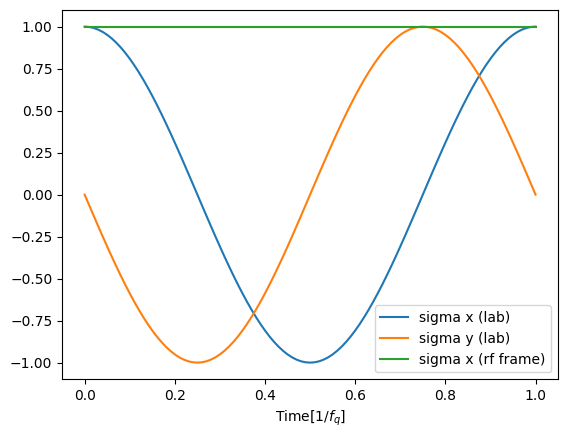

In [35]:
# plot the time evolution of bloch vector
x_lab = result_lab.expect[0]
y_lab = result_lab.expect[1]
x_rf = [expect(sigmax(), psi) for psi in psi_rf]

plt.plot(time_list, x_lab, label="sigma x (lab)")
plt.plot(time_list, y_lab, label="sigma y (lab)")
plt.plot(time_list, x_rf, label="sigma x (rf frame)")
plt.legend(loc=0)
plt.xlabel(r"Time[$1/f_q$]")

# Implementing quantum gates: evolution after a fast switch
Let's try to realize a $\pi$-gate (X-gate) rotating the qubit state around X-axis by 180 degrees by switching on and off the x field ($\omega_x$).

In the example below, we simulate the simular situation to "Exercise 24" of the homework 1 part 2. The Hamiltonian of the system has time-dependent factor $\omega_x(t)$;
$$\mathcal{H}/\hbar=-\frac{\omega_z}{2}\hat{\sigma}_z-\frac{\omega_x(t)}{2}\hat{\sigma}_x$$
where
\begin{equation}
\omega_x(t)=
\left\{ \,
    \begin{aligned}
    & g \quad\bigg(n(\tau_1+\tau_2)\leq t <n(\tau_1+\tau_2)+\tau_1\bigg) \\
    & 0 \quad\bigg(n(\tau_1+\tau_2)+\tau_1\leq t <(n+1)(\tau_1+\tau_2)\bigg)\\
    \end{aligned}
\right.
\end{equation}
and $g=\omega_z$, $\tau_1=\pi/\sqrt{\omega_z^2+g^2}$ and $\tau_2=\pi/\omega_z$. (In Exercise 24, $g=\omega_z/10$)


For solving time-dependent Hamiltonian with QuTip, you can refer to [Solving Problems with Time-dependent Hamiltonians](https://qutip.readthedocs.io/en/qutip-5.0.x/guide/dynamics/dynamics-time.html)

In [36]:
time_list = np.linspace(0, 1.5, 201) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q

g = omega_q/1
tau1 = np.pi/np.sqrt(omega_q**2+g**2)
tau2 = np.pi/omega_q

# definition of the initial state
psi0 = basis(2,0) # ground state in 2 level system

# Definition of the pulse shape (omega_x(t))
def omega_x(t):
    tau = tau1 + tau2
    n=int(t//tau)
    if t < n*tau+tau1:
        return g
    else:
        return 0

# Definition of the time-dependent Hamiltonian
H0 = -omega_q / 2 * sigmaz()
H1 = -1 / 2 * sigmax()
H = [H0, [H1, omega_x]]

# solve the Schrodinger equation
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})

Text(0.5, 1.0, 'Pulse sequence')

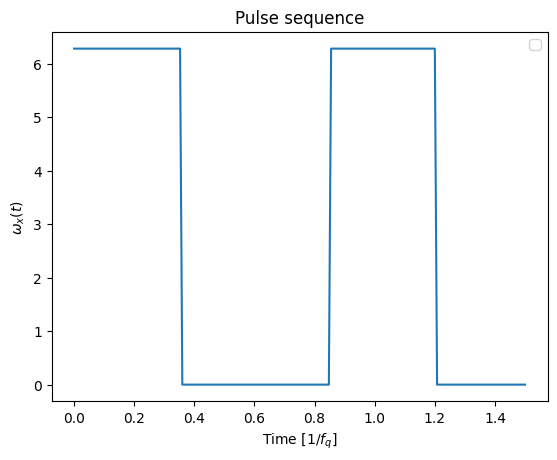

In [37]:
# plot the pulse sequence shape (omega_x(t))
plt.plot(time_list, [omega_x(t) for t in time_list])
plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel(r"$\omega_x(t)$")
plt.title("Pulse sequence")

Text(0, 0.5, 'Expectation value')

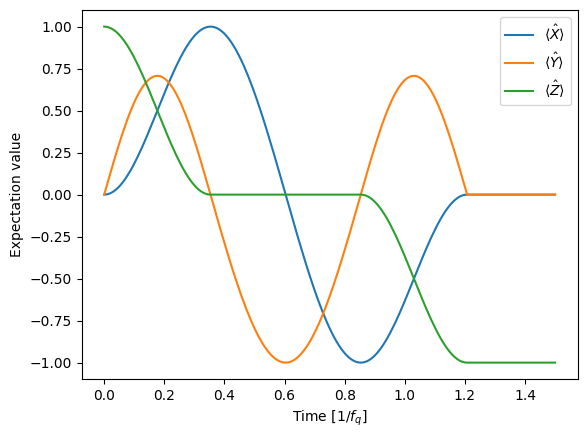

In [38]:
# plot the time evolution of bloch vector
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

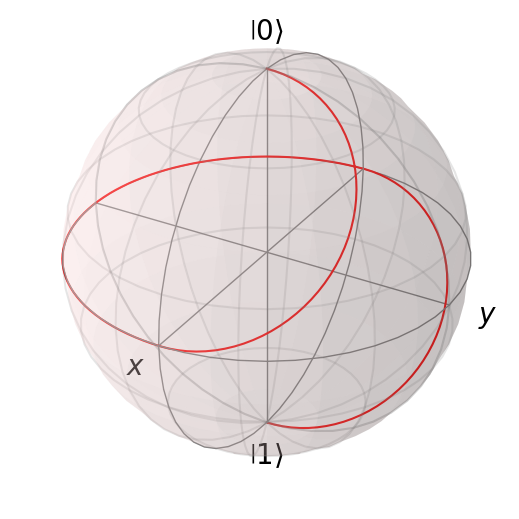

In [39]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")

b.render()
b.show()

In [40]:
# acquire the eigenstates of the schrodinge eq (qubit state)
psi_lab = result.states
# calculate the rotating frame states by multiplying U_rf on psi_lab
psi_rf=[]
for time_idx, time in enumerate(time_list):
  oper=-1j*omega_q/2*time*sigmaz()
  U_rf=oper.expm()
  psi_rf.append(U_rf*psi_lab[time_idx])

Text(0.5, 1.0, 'Time-evolution in rotating frame')

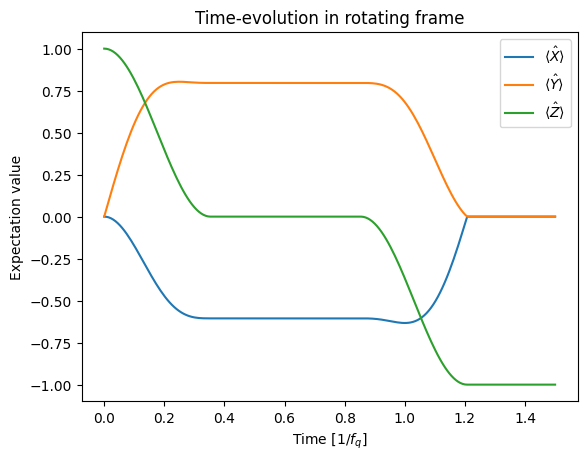

In [41]:
# plot the expectation value of X
exp_x_rf = expect(sigmax(),psi_rf)
exp_y_rf = expect(sigmay(),psi_rf)
exp_z_rf = expect(sigmaz(),psi_rf)

plt.plot(time_list, exp_x_rf, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y_rf, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z_rf, label=r"$\langle\hat{Z}\rangle$")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")
plt.title("Time-evolution in rotating frame")

# Implementing quantum gates: evolution under periodic drive
Next, let us consider a periodically driven qubit with a simplest Hamiltonian
$$\mathcal{H}/\hbar=-\frac{\omega}{2}\hat{\sigma}_z-g\cos(\omega_dt)\hat{\sigma}_x$$

When we move on to the rotating frame with a unitary operator $U=\exp(-i\frac{\omega_dt}{2}\hat{\sigma_z})$, the rotating-frame Hamiltonian is
$$\mathcal{H}_{\mathrm{rf}}=-\frac{\Delta}{2}\hat{\sigma}_z-\frac{g}{2}\hat{\sigma}_x$$
Here, we used the rotation wave approximation and removed the high-frequency oscillating terms. ($\propto\exp(\pm 2i\omega_dt)$)

In the example below, first simulate the qubit dynamics in the laboratory frame.

When $\omega_d=\omega$ and $g=\omega/20$, simulate the time evolution of $|0\rangle$ state.

In [68]:
time_list = np.linspace(0, 11, 1001) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q
omega_d = 2*np.pi*f_q # on-resonance drive

g = omega_q/20

# definition of the initial state
psi0 = basis(2,0) # ground state in 2 level system

# Definition of the time-dependent Hamiltonian
H0 = -omega_q / 2 * sigmaz()
H1 = -g * sigmax()
H = [H0, [H1, lambda t: np.cos(omega_d*t)]]

# solve the Schrodinger equation
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})

Pi pulse time[1/f_q]:9.998999999999999


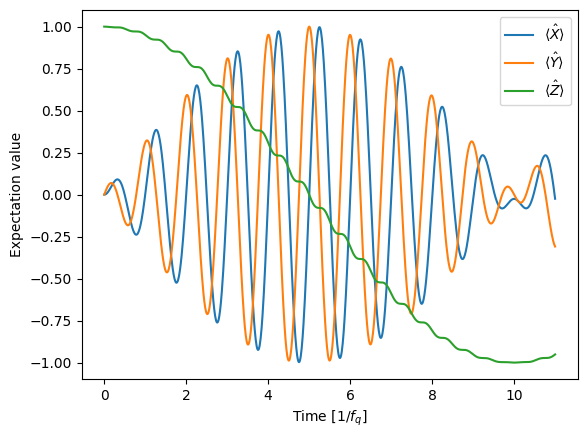

In [69]:
# plot the expectation value of X
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

print(f"Pi pulse time[1/f_q]:{time_list[np.argmin(exp_z)]}")

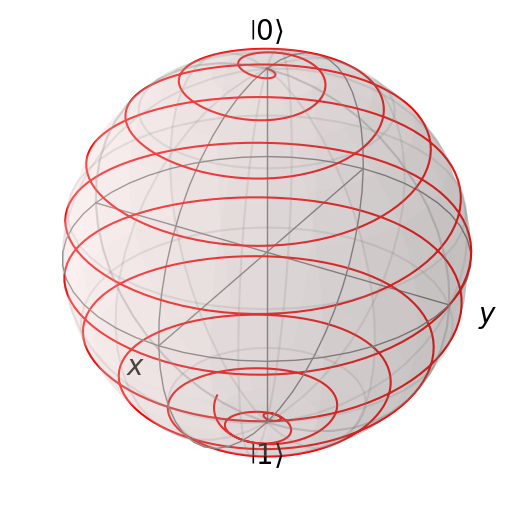

In [70]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")

b.render()
b.show()

Next, let's simulate the same dynamics on the rotating frame.

In [79]:
time_list = np.linspace(0, 21, 1001) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q
omega_d = 2*np.pi*f_q # on-resonance drive
delta=omega_q-omega_d

g = omega_q/20

# definition of the initial state
psi0 = basis(2,0) # ground state in 2 level system

# Definition of the ROTATING FRAME Hamiltonian
H = -delta/2 * sigmaz() - g/2 * sigmax()

# solve the Schrodinger equation
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})

Pi pulse time[1/f_q]:9.996


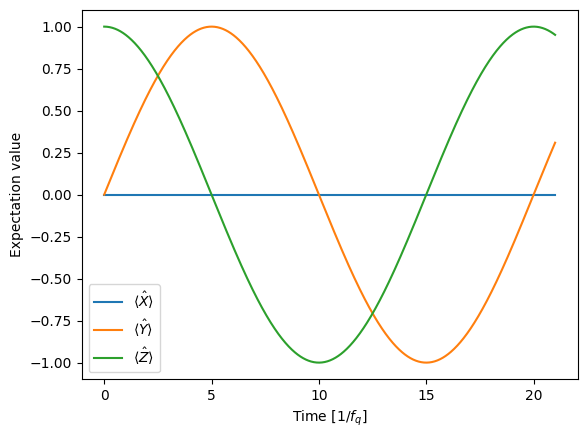

In [80]:
# plot the expectation value of X
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

print(f"Pi pulse time[1/f_q]:{time_list[np.argmin(exp_z)]}")

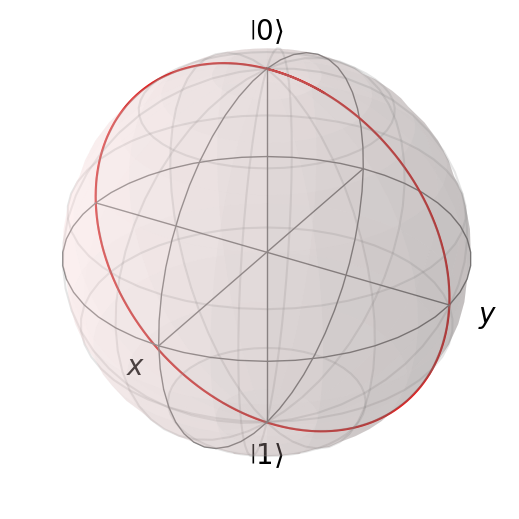

In [81]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")

b.render()
b.show()

Finally, let's try off-resonant ($\omega_d\neq\omega$) driving of the qubit.

In [93]:
time_list = np.linspace(0, 21, 1001) # [1/f_q] time points normalized by qubit freq
f_q = 1 # [] normalized qubit frequency
omega_q = 2*np.pi*f_q
omega_d = 2*np.pi*f_q + 1*g # off-resonance
delta=omega_q-omega_d

g = omega_q/20

# definition of the initial state
psi0 = basis(2,0) # ground state in 2 level system

# Definition of the ROTATING FRAME Hamiltonian
H = -delta/2 * sigmaz() - g/2 * sigmax()

# solve the Schrodinger equation
result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmax(), sigmay(), sigmaz()],options={"store_states":True})

Pi pulse time[1/f_q]:7.077000000000001


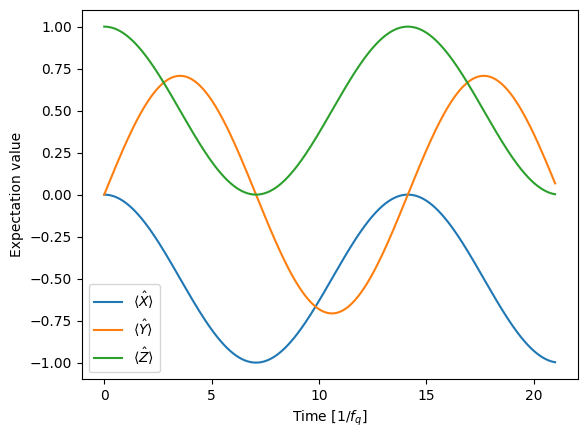

In [94]:
# plot the expectation value of X
exp_x = result.expect[0]
exp_y = result.expect[1]
exp_z = result.expect[2]

plt.plot(time_list, exp_x, label=r"$\langle\hat{X}\rangle$")
plt.plot(time_list, exp_y, label=r"$\langle\hat{Y}\rangle$")
plt.plot(time_list, exp_z, label=r"$\langle\hat{Z}\rangle$")

plt.legend(loc=0)
plt.xlabel(r"Time [1/$f_q$]")
plt.ylabel("Expectation value")

print(f"Pi pulse time[1/f_q]:{time_list[np.argmin(exp_z)]}")

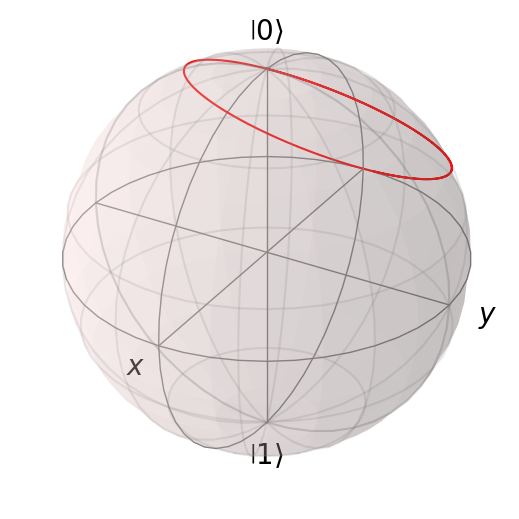

In [95]:
# plot on Bloch sphere
b = Bloch()
b.make_sphere()

# plot the time trace of the state
b.add_points(result.expect, meth="l", colors="red")

b.render()
b.show()

As we already saw in the "Hamiltonian operator for qubits", the rotation axis is no more the north pole and the oscillation frequency is increased.

## Chevron plot (Exercise 36)
As we saw in the previous off-resonance drive, the qubit rabi frequency and also rabi oscillation contrast depend on the detuning $\Delta$. When the detunign increases, the rabi oscillation gets faster and smaller (lower contrast).

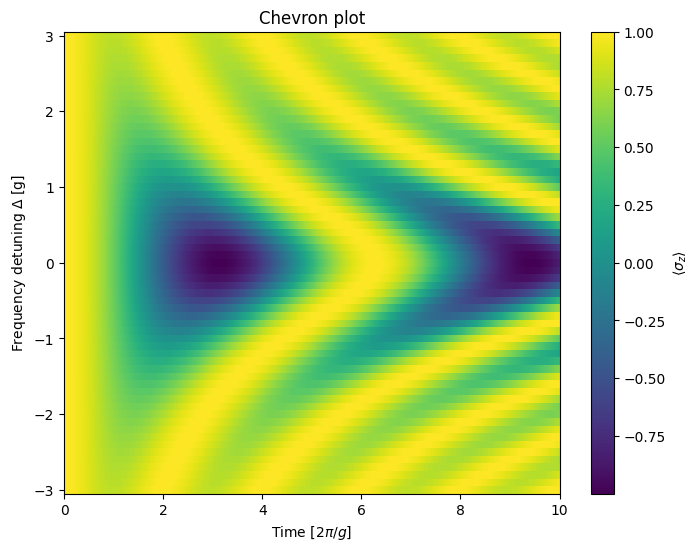

In [98]:
# Parameters
time_list = np.linspace(0, 10, 1001)  # [2pi/g] time points normalized by coupling
g = 1  # normalized coupling
delta_list = np.linspace(-3, 3, 61)  # detuning (normalized by coupling g)

# Initialize an empty list to store the data
data = []

# Loop over detuning values (delta)
for delta in delta_list:
    # Initial state: ground state of the 2-level system
    psi0 = basis(2, 0)

    # Define the rotating-frame Hamiltonian
    H = -delta/2 * sigmaz() - g/2 * sigmax()

    # Solve the Schrodinger equation and obtain the expectation value of sigma_z
    result = mesolve(H=H, rho0=psi0, tlist=time_list, e_ops=[sigmaz()])

    # Append the expectation values to the data list
    data.append(result.expect[0])

# Convert the data list into a 2D NumPy array
data = np.array(data)

# Create the 2D color plot
plt.figure(figsize=(8, 6))
plt.pcolormesh(time_list, delta_list, data, shading='auto', cmap='viridis')
plt.colorbar(label=r'$\langle \sigma_z \rangle$')

# Labels and title
plt.xlabel(r'Time [$2\pi/g$]')
plt.ylabel(r'Frequency detuning $\Delta$ [g]')
plt.title(r'Chevron plot')

# Show the plot
plt.show()